# Exploratory Data Anaylsis

With the cleaned data, we examine some preliminary relationships between the price of wheat and factors such as temperature, precipitation, and the price of a substitute product. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

To do our early data analysis, we first want to import all of our data, and start analyzing where all of the datasets begin to have data (in this case, Jan 1995 - Dec 2010)

In [3]:
sorghum_price_df=pd.read_csv('../cleaned_data/sorghumprice_df.csv')
sorghum_price_df=sorghum_price_df.set_index(['Year','Month']).reset_index()
if 'Unnamed: 0' in sorghum_price_df.columns:
    del sorghum_price_df['Unnamed: 0']
sorghum_price_df=sorghum_price_df[(sorghum_price_df['Year'] > 1994) & (sorghum_price_df['Year'] < 2011)].set_index(['Year']).reset_index()
sorghum_price_df.columns=['Year','Month','Sorghum_Price','SP_Change']
sorghum_price_df['SP_Change']=sorghum_price_df['SP_Change'].map(lambda x: x.rstrip("%"))
sorghum_price_df['SP_Change']=sorghum_price_df['SP_Change'].map(lambda x: float(x))
sorghum_price_df.head()

,Year,Month,Sorghum_Price,SP_Change
0,1995,Jan,101.74,1.11
1,1995,Feb,102.07,0.32
2,1995,Mar,102.74,0.66
3,1995,Apr,103.29,0.54
4,1995,May,108.06,4.62


In [4]:
corn_price_df=pd.read_csv("../cleaned_data/cornpricedf.csv")
corn_price_df=corn_price_df.set_index(['year','month']).reset_index()
del corn_price_df['Unnamed: 0']
corn_price_df=corn_price_df[(corn_price_df['year'] > 1994) & (corn_price_df['year'] < 2011)].set_index(['year']).reset_index()
corn_price_df.columns=['Year','Month','Corn_Price','CP_Change']
corn_price_df['CP_Change']=corn_price_df['CP_Change'].map(lambda x: x.rstrip("%"))
corn_price_df['CP_Change']=corn_price_df['CP_Change'].map(lambda x: float(x))
corn_price_df.head()

,Year,Month,Corn_Price,CP_Change
0,1995,Jan,106.90,4.23
1,1995,Feb,106.98,0.07
2,1995,Mar,109.63,2.48
3,1995,Apr,109.64,0.01
4,1995,May,111.93,2.09


In [5]:
inflation_df=pd.read_csv("../cleaned_data/inflationdf.csv")
del inflation_df["Unnamed: 0"]
inflation_df=inflation_df[(inflation_df['Year'] > 1994) & (inflation_df['Year'] < 2011)].set_index(['Year']).reset_index()
inflation_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,1995,0.40,0.40,0.33,0.33,0.20,0.20,0.00,0.26,0.20,0.33,-0.07,-0.07
1,1996,0.59,0.32,0.52,0.39,0.19,0.06,0.19,0.19,0.32,0.32,0.19,0.00
2,1997,0.32,0.31,0.25,0.12,-0.06,0.12,0.12,0.19,0.25,0.25,-0.06,-0.12
3,1998,0.19,0.19,0.19,0.18,0.18,0.12,0.12,0.12,0.12,0.24,0.00,-0.06
4,1999,0.24,0.12,0.30,0.73,0.00,0.00,0.30,0.24,0.48,0.18,0.06,0.00


In [6]:
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
rev_months={v: k for k, v in months.items()}
rev_months[9]='Sep'
new_inf=[]
for i in np.arange(len(inflation_df.index)):
    for col in inflation_df:
        if col!='Year':
            d={}
            inf_year_month=inflation_df[['Year',col]]
            d['Inflation']=inflation_df[col][i]
            d['Month']=months[col]
            d['Year']=inflation_df['Year'][i]
            new_inf.append(d)
new_inf=pd.DataFrame(new_inf)
new_inf=new_inf.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
new_inf['Month']=new_inf['Month'].map(lambda x: rev_months[x])
new_inf = new_inf[(new_inf['Year'] > 1994) & (new_inf['Year'] < 2011)]
new_inf.head()

,Year,Month,Inflation
0,1995,Jan,0.40
1,1995,Feb,0.40
2,1995,Mar,0.33
3,1995,Apr,0.33
4,1995,May,0.20


Create dictionary with key as year and value as list of top 10 wheat producing states

In [7]:
#this mapping between states and abbreviations will come in handy later
states_abbrev = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'American Samoa': 'AS',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Columbia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Northern Mariana Islands': 'MP',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'National': 'NA',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Virgin Islands': 'VI',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY' 
}

In [8]:
wheatproduction = pd.read_csv("../cleaned_data/wheatproduction.csv")
grouped = wheatproduction.groupby('Year')
top_producers = {}
for k,v in grouped:
    states = list(v.sort('Value', ascending = False).State)
    abbrev = []
    for i in xrange(11):
        abbrev.append(states_abbrev[states[i]])
    top_producers[k] = abbrev

In [9]:
prec_df=pd.read_csv("../cleaned_data/precdf.csv")
del prec_df['Unnamed: 0']
prec_df=prec_df[(prec_df['Year'] > 1994) & (prec_df['Year'] < 2011)].set_index(['State']).reset_index()
prec_df.head()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AK,1995,7.123391,6.137565,5.789217,5.220609,7.546870,6.379043,8.656957,8.091478,16.222783,10.711130,6.080000,7.904696
1,AK,1996,3.767456,10.588509,5.155614,4.923596,2.425088,6.856404,5.376404,10.632544,11.493596,9.654737,5.764123,5.476842
2,AK,1997,7.787456,10.817193,4.292895,5.321579,4.591316,4.761930,8.129737,12.182456,13.685263,9.356140,11.094298,14.864386
3,AK,1998,5.331754,6.236579,5.311228,8.611842,7.783509,6.606053,9.086228,13.874649,11.543246,11.385702,6.267544,8.507456
4,AK,1999,9.033805,5.059115,7.488053,7.365310,6.638850,5.871416,7.139115,11.576903,15.863451,16.015221,9.392389,15.051593


In [10]:
prec_by_year=prec_df.sort(['Year']).set_index(['Year']).reset_index()

In [11]:
new_prec=[]
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
#first separate each into each year
for year in prec_by_year['Year'].unique():
    prec_year=prec_by_year[prec_by_year['Year']==year].set_index(['State']).reset_index()
    #then focus on each month in that year
    for col in prec_year:
        if (col!='Year') & (col!='State'):
            d={}
            prec_year_month=prec_year[['Year','State',col]]
            for i in np.arange(len(prec_year_month.index)):
                d[prec_year_month['State'][i]+'_P']=prec_year_month[col][i]
            d['Month']=months[col]
            d['Year']=prec_year['Year'][0]
            new_prec.append(d)
new_prec=pd.DataFrame(new_prec)
new_prec=new_prec.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
new_prec['Month']=new_prec['Month'].map(lambda x: rev_months[x])
new_prec.tail()

,Year,Month,AK_P,AL_P,AR_P,AS_P,AZ_P,CA_P,CO_P,CT_P,DE_P,FL_P,FM_P,GA_P,GU_P,HI_P,IA_P,ID_P,IL_P,IN_P,KS_P,KY_P,LA_P,MA_P,MD_P,ME_P,MH_P,MI_P,MN_P,MO_P,MP_P,MS_P,MT_P,NC_P,ND_P,NE_P,NH_P,NJ_P,NM_P,NV_P,NY_P,OH_P,OK_P,OR_P,PA_P,PR_P,PW_P,RI_P,SC_P,SD_P,TN_P,TX_P,UM_P,UT_P,VA_P,VI_P,VT_P,WA_P,WI_P,WV_P,WY_P
187,2010,Aug,8.467807,12.590635,4.048849,23.000,5.097714,0.154019,5.547477,9.489394,7.42000,21.521552,39.456667,12.568478,30.94,5.193725,12.500536,1.721552,7.913393,4.904863,7.133959,8.674706,15.948788,10.701688,10.996667,7.027273,21.661667,5.881880,12.216500,6.708994,27.415,12.642791,5.228263,12.154465,5.984307,7.841792,9.7088,7.452593,5.518306,0.636832,10.696321,6.772903,4.472462,0.918010,7.689691,21.676615,30.745,7.85875,14.528387,5.555278,11.145196,2.953622,NaN,3.023273,11.723307,11.016154,10.200233,1.793631,11.388684,8.852021,2.478321
188,2010,Sep,7.563333,4.006587,9.230719,29.855,1.567029,0.345311,1.541651,6.511818,11.80500,13.001379,28.046667,8.700797,30.87,4.689608,13.890000,1.888707,9.253795,3.564178,9.608942,4.741471,3.795333,6.802597,13.516222,12.723636,27.813333,11.660301,18.118188,19.643017,33.690,2.701008,4.200339,17.943145,10.085474,6.265958,7.5162,8.778333,3.604536,0.481782,8.005130,5.420581,10.650955,4.859948,8.716134,19.187538,32.765,7.96000,12.788495,8.564861,5.376569,13.297660,NaN,0.640424,12.816299,11.433846,7.768140,8.741847,15.281263,6.842979,0.713511
189,2010,Oct,13.816842,7.338175,3.536331,34.375,3.359429,7.457321,2.801147,14.080909,12.32500,1.993276,34.766667,4.531304,34.39,8.255196,2.533571,4.700086,3.349777,2.943288,1.961092,4.207721,3.138727,15.714545,11.486444,15.779351,35.315000,5.126541,5.469000,1.969162,23.800,4.560930,1.753432,6.935283,2.952774,1.950208,18.9946,13.643148,2.204809,4.812277,16.613161,4.854839,4.397839,9.245026,13.113351,33.308615,27.085,11.23125,3.897527,2.735347,6.817451,2.172885,NaN,6.380485,9.053937,32.951538,22.463953,10.565987,5.744316,6.566702,2.296031
190,2010,Nov,11.817368,12.435317,10.462230,30.125,0.624400,7.024211,1.591560,8.416364,5.70625,5.089138,24.267333,6.412609,11.14,12.143333,4.250476,5.685690,7.913482,12.618836,4.021331,12.469485,13.648182,9.876364,5.899556,13.521948,39.618333,5.477519,3.892625,8.020950,13.140,14.509612,3.585636,4.837862,1.764015,2.026042,8.8522,5.659815,0.235246,2.414158,7.093782,10.810194,4.677739,13.803455,8.092835,17.109385,27.490,9.39875,3.677742,0.931319,14.451471,3.494407,NaN,3.592424,5.101102,19.686923,7.664419,13.865924,4.262947,7.572340,2.213969
191,2010,Dec,5.167719,5.390159,4.312014,34.920,4.350743,22.050742,2.855688,11.801818,6.59125,2.655517,21.963333,6.254855,9.25,22.453725,3.209583,8.206810,4.590893,4.177055,0.529761,7.764706,5.488424,10.428831,6.172222,15.461948,19.596667,3.512782,5.133000,2.563073,7.050,4.398140,2.823602,7.665472,3.237080,0.931083,10.7050,9.152407,1.802022,6.510792,8.770518,4.826323,2.114724,20.532461,8.613711,13.812308,24.390,10.38250,5.506129,2.543681,7.012843,2.510577,NaN,9.297818,7.802598,5.137692,9.818605,18.686943,4.568211,8.729149,2.350458


We only want to include the precipitation data of the top ten producing states for the specific year.

In [12]:
for i in np.arange(1,11):
    new_prec[str(i)+'_P'] = new_prec['Year'].map(lambda x: top_producers[x][i-1]+'_P')
for i in np.arange(1,11):
    new_prec[str(i)+'_P'] = new_prec[new_prec[str(i)+'_P']]
new_prec.head()

,Year,Month,AK_P,AL_P,AR_P,AS_P,AZ_P,CA_P,CO_P,CT_P,DE_P,FL_P,FM_P,GA_P,GU_P,HI_P,IA_P,ID_P,IL_P,IN_P,KS_P,KY_P,LA_P,MA_P,MD_P,ME_P,MH_P,MI_P,MN_P,MO_P,MP_P,MS_P,MT_P,NC_P,ND_P,NE_P,NH_P,NJ_P,NM_P,NV_P,NY_P,OH_P,OK_P,OR_P,PA_P,PR_P,PW_P,RI_P,SC_P,SD_P,TN_P,TX_P,UM_P,UT_P,VA_P,VI_P,VT_P,WA_P,WI_P,WV_P,WY_P,1_P,2_P,3_P,4_P,5_P,6_P,7_P,8_P,9_P,10_P
0,1995,Jan,7.123391,12.065317,12.828417,45.315,6.001897,35.020968,1.809312,10.072121,8.63750,8.294017,19.651667,11.719855,6.812,8.438039,2.174464,5.955776,8.018571,7.377055,2.547850,12.126985,16.164364,9.780779,9.549333,10.797273,17.861667,5.955338,1.576625,8.159162,7.3075,12.813333,1.530508,15.100126,1.222044,1.226958,9.0586,8.541111,2.225137,5.505149,7.847409,9.528387,5.107337,20.719529,8.705515,6.266154,39.515,8.60000,14.228710,0.941528,13.564510,5.145753,1.545,4.679879,13.304882,5.488462,7.754884,13.978344,2.230632,12.320000,1.618397,1.222044,2.547850,1.530508,13.978344,5.107337,1.809312,5.955776,0.941528,1.226958,5.145753
1,1995,Feb,6.137565,15.365794,5.075683,52.980,3.912414,3.441911,2.147018,7.275455,5.58250,4.912137,19.971111,15.927754,2.620,9.696569,0.837857,3.005948,2.606652,3.061507,0.851263,7.871471,8.313576,7.049221,4.954222,6.858961,13.705000,2.568195,1.057625,3.617095,3.7850,9.596822,1.219280,12.145849,0.916131,0.884667,6.4084,6.070185,1.200109,1.066436,5.545596,3.322839,1.266533,8.124241,5.020258,12.421231,34.260,8.09250,13.243226,1.157014,7.111275,2.924247,1.010,2.315333,5.517402,6.617692,5.637907,11.370000,0.893474,6.650851,1.532595,0.916131,0.851263,1.219280,11.370000,1.266533,2.147018,3.005948,1.157014,0.884667,2.924247
2,1995,Mar,5.789217,13.659206,8.472014,37.635,3.576724,25.546154,4.012477,5.876667,5.91750,8.098120,19.582222,8.271087,3.986,8.020196,6.332262,7.092500,6.101071,6.625411,5.798942,7.754779,23.626970,6.025844,4.671333,6.799870,14.660000,4.194060,6.208312,5.095028,0.8400,18.946512,3.124280,8.457233,3.656350,5.197042,6.5524,4.898889,1.786721,5.289010,4.272383,4.737032,7.932060,12.853194,4.428969,6.518769,27.655,6.11875,5.635591,4.988750,10.289902,7.215817,1.955,6.411455,5.921496,2.273846,5.700698,11.540446,5.439053,5.840319,2.475420,3.656350,5.798942,3.124280,11.540446,7.932060,4.012477,7.092500,4.988750,5.197042,7.215817
3,1995,Apr,5.220609,12.733651,15.554460,36.215,1.547011,6.499429,5.939266,6.909394,5.65875,9.294530,22.808333,5.445072,8.340,12.535392,12.473512,4.349914,11.354777,11.472877,7.415392,9.534632,21.958848,5.838182,6.040000,5.580390,50.935000,8.322406,6.214625,12.983408,5.7250,18.426744,3.989153,2.917547,2.496423,8.111917,4.9200,4.744074,1.841257,2.500198,5.816218,9.280710,11.394724,10.746806,6.249330,6.267231,7.180,7.71625,3.087419,8.754792,8.951471,7.770641,4.250,4.214545,4.271181,1.821538,5.436047,7.238981,7.950263,6.029255,4.120000,2.496423,7.415392,3.989153,7.238981,11.394724,5.939266,4.349914,8.754792,8.111917,7.770641
4,1995,May,7.546870,8.343413,13.002590,35.945,0.788908,4.212804,10.363165,7.938485,10.56000,7.977179,30.413889,6.660290,14.212,7.484118,15.281310,6.081552,22.131161,18.415137,24.332662,23.237132,18.258788,6.992987,11.430000,9.732597,21.553333,6.900827,8.112000,24.774134,10.6950,13.959225,6.572669,10.323082,8.134672,17.822125,7.5978,9.131852,3.607596,5.832574,5.583212,15.302000,18.445678,5.030995,9.757010,23.241538,34.920,8.15750,7.358495,13.960139,16.395196,13.212388,5.325,8.227636,12.583701,8.923077,5.862326,3.469490,9.304737,15.639787,9.620000,8.134672,24.332662,6.572669,3.469490,18.445678,10.363165,6.081552,13.960139,17.822125,13.212388


In [13]:
temp_df=pd.read_csv("../cleaned_data/tempdf.csv")
del temp_df['Unnamed: 0']
temp_df=temp_df[(temp_df['Year'] > 1994) & (temp_df['Year'] < 2011)].set_index(['State']).reset_index()
temp_df.head()

,State,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AK,1995,-12.445260,-8.367532,-6.563247,2.549675,7.728182,11.788766,13.526364,11.594935,8.864935,0.430714,-7.723701,-11.932468
1,AK,1996,-16.260000,-13.498442,-6.184740,0.217078,6.951558,11.842403,13.753377,11.788052,7.029416,-2.241494,-9.112078,-13.413636
2,AK,1997,-13.658117,-5.749416,-5.873701,0.772532,6.700390,12.387532,13.926818,12.079545,8.146623,-1.473896,-4.614805,-8.935065
3,AK,1998,-9.501494,-7.298896,-4.462338,1.345455,5.668506,11.687597,13.703896,11.593896,7.624156,-0.392922,-7.814026,-13.244805
4,AK,1999,-11.512987,-12.314610,-7.826104,-1.812532,6.167078,11.702922,13.491558,12.104545,8.021429,1.039286,-4.866364,-9.715584


In [14]:
temp_by_year=temp_df.sort(['Year']).set_index(['Year']).reset_index()
new_temp=[]
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov ':11,'Dec':12}
#first separate each into each year
for year in temp_by_year['Year'].unique():
    temp_year=temp_by_year[temp_by_year['Year']==year].set_index(['State']).reset_index()
    #then focus on each month in that year
    for col in temp_year:
        if (col!='Year') & (col!='State'):
            d={}
            temp_year_month=temp_year[['Year','State',col]]
            for i in np.arange(len(temp_year_month.index)):
                d[temp_year_month['State'][i]+'_T']=temp_year_month[col][i]
            d['Month']=months[col]
            d['Year']=temp_year['Year'][0]
            new_temp.append(d)
new_temp=pd.DataFrame(new_temp)
new_temp=new_temp.sort(['Year','Month']).set_index(['Year','Month']).reset_index()
new_temp['Month']=new_temp['Month'].map(lambda x: rev_months[x])
new_temp.tail()

,Year,Month,AK_T,AL_T,AR_T,AS_T,AZ_T,CA_T,CO_T,CT_T,DE_T,FL_T,FM_T,GA_T,GU_T,HI_T,IA_T,ID_T,IL_T,IN_T,KS_T,KY_T,LA_T,MA_T,MD_T,ME_T,MH_T,MI_T,MN_T,MO_T,MP_T,MS_T,MT_T,NC_T,ND_T,NE_T,NH_T,NJ_T,NM_T,NV_T,NY_T,OH_T,OK_T,OR_T,PA_T,PR_T,PW_T,RI_T,SC_T,SD_T,TN_T,TX_T,UM_T,UT_T,VA_T,VI_T,VT_T,WA_T,WI_T,WV_T,WY_T
187,2010,Aug,11.933571,27.375402,28.346040,26.90,26.304813,22.444842,20.294057,21.429565,24.481111,28.127299,27.5125,26.941071,27.55,23.387347,24.051168,19.671397,24.938831,24.448137,27.370764,25.757027,28.722529,21.010508,24.160000,18.748125,28.050,21.104599,21.666603,26.492055,26.985,28.017500,19.282168,24.744855,21.360000,24.776937,18.96775,23.207111,22.531775,22.397281,20.362039,23.385242,28.99656,18.923989,21.930519,26.430000,27.95,21.82500,26.573765,23.609375,26.060513,28.966019,NaN,21.759571,23.870283,27.790,18.805135,18.821346,21.498875,22.704270,20.116336
188,2010,Sep,7.232857,24.158851,22.900594,27.15,25.245625,21.435072,16.561698,17.611304,20.846667,26.846350,27.6175,23.935089,27.35,23.409796,17.247883,13.930074,19.061364,19.142549,21.320255,21.072027,25.384253,17.347966,20.294375,14.146406,27.650,14.933577,13.821731,20.080342,25.850,24.331818,11.820664,21.703696,12.426885,17.849937,14.79275,19.397333,20.167574,18.824737,16.111645,18.505242,23.35384,14.299415,17.490593,26.273871,28.40,18.53375,23.807529,15.090347,21.624103,24.928102,NaN,18.107975,20.351132,27.024,14.642432,13.669872,14.532875,18.314607,14.178168
189,2010,Oct,0.217208,18.919885,18.028515,27.50,17.734063,16.300086,9.449670,10.973043,14.538889,24.197299,27.5425,18.868750,27.65,22.968571,12.538613,8.872059,14.158961,13.892745,15.764777,15.602838,20.715862,10.511186,14.070208,7.098125,27.500,9.804599,9.380513,15.446027,26.145,19.299318,8.347080,15.971667,8.281230,12.436375,7.68300,12.922667,13.624320,11.583158,9.521711,12.861855,18.02144,10.199202,11.417778,25.587097,27.95,12.05500,18.339647,10.174583,16.205299,20.644653,NaN,10.259632,14.314717,26.470,7.242973,9.500962,10.047500,12.649551,8.436412
190,2010,Nov,-5.690325,12.390575,11.199505,27.20,10.530188,11.200344,1.761085,5.391739,8.502222,19.274453,27.5800,12.360804,28.35,21.983673,4.119270,1.428897,7.271364,7.132745,7.404586,8.837162,14.972644,5.333729,7.933958,2.144375,27.400,3.496277,0.560128,8.769178,26.090,12.952500,-1.154336,9.735435,-1.198443,3.404437,2.69100,7.160222,6.481302,4.296228,4.125658,6.560806,10.76392,5.232340,5.806741,24.064194,28.30,6.82625,11.738824,0.804861,9.621538,14.797477,NaN,2.420982,8.226038,25.214,2.049730,4.861282,2.209125,6.580449,-1.195878
191,2010,Dec,-12.815390,5.431149,1.966832,27.65,8.538187,9.013954,-3.263443,-2.268261,0.196667,14.550803,27.7000,5.573304,28.30,20.846531,-10.293577,-5.204632,-6.301429,-5.362549,-3.441720,-1.855541,8.623563,-2.184407,-0.587500,-6.008750,27.575,-6.925912,-14.874487,-4.037123,25.750,5.812841,-11.784690,1.871522,-16.097869,-7.858000,-5.70525,-0.683556,2.749231,1.764912,-4.665329,-4.480484,0.93136,0.755106,-3.241481,23.175806,28.15,-0.52750,4.923176,-11.951736,0.386068,7.508333,NaN,-1.452147,-0.292925,24.774,-7.088649,-0.802179,-11.064625,-3.244494,-8.811069


In [15]:
for i in np.arange(1,11):
    new_temp[str(i)+'_T'] = new_temp['Year'].map(lambda x: top_producers[x][i-1]+'_T')
for i in np.arange(1,11):
    new_temp[str(i)+'_T'] = new_temp[new_temp[str(i)+'_T']]
new_temp.head()

,Year,Month,AK_T,AL_T,AR_T,AS_T,AZ_T,CA_T,CO_T,CT_T,DE_T,FL_T,FM_T,GA_T,GU_T,HI_T,IA_T,ID_T,IL_T,IN_T,KS_T,KY_T,LA_T,MA_T,MD_T,ME_T,MH_T,MI_T,MN_T,MO_T,MP_T,MS_T,MT_T,NC_T,ND_T,NE_T,NH_T,NJ_T,NM_T,NV_T,NY_T,OH_T,OK_T,OR_T,PA_T,PR_T,PW_T,RI_T,SC_T,SD_T,TN_T,TX_T,UM_T,UT_T,VA_T,VI_T,VT_T,WA_T,WI_T,WV_T,WY_T,1_T,2_T,3_T,4_T,5_T,6_T,7_T,8_T,9_T,10_T
0,1995,Jan,-12.445260,8.542069,6.305050,28.25,6.127813,8.175129,-2.296887,0.031304,3.881111,15.756058,27.140000,8.685357,26.20,19.248163,-6.024234,-1.908971,-1.634156,-0.077941,0.709490,3.546892,10.926322,-0.184746,3.548125,-6.188906,27.100,-3.970000,-9.737949,0.674795,25.000,8.645341,-6.051947,5.849203,-11.969180,-3.626063,-3.83600,2.207333,1.788935,1.333860,-1.604737,0.190081,4.85936,3.160053,0.605407,23.656774,25.950,1.17750,8.001882,-6.796111,5.054530,9.807940,25.970,-0.892147,3.837264,22.578,-4.383514,2.167821,-6.624125,1.794045,-5.128015,-11.969180,0.709490,-6.051947,2.167821,4.85936,-2.296887,-1.908971,-6.796111,-3.626063,9.807940
1,1995,Feb,-8.367532,9.600230,8.183267,28.35,9.597750,10.683295,1.233585,-0.691739,2.833333,16.187591,26.858333,9.339554,26.30,19.467959,-0.214234,1.241985,2.162792,1.674510,5.381210,4.537568,12.119655,-0.966102,2.768958,-5.833906,27.175,-2.724453,-4.541282,4.623630,24.250,9.784886,-0.752566,5.909783,-4.368770,2.377937,-4.20900,1.009556,5.483432,5.724561,-2.788882,0.762258,8.08976,5.911223,-0.186148,23.726452,26.100,0.51000,8.226235,-0.584306,6.102479,11.911921,26.325,3.533865,3.736981,23.354,-5.120541,5.144744,-3.014875,2.213146,-1.565344,-4.368770,5.381210,-0.752566,5.144744,8.08976,1.233585,1.241985,-0.584306,2.377937,11.911921
2,1995,Mar,-6.563247,13.407586,11.306535,28.50,10.953062,10.460029,2.182358,3.839130,8.026667,18.254599,26.958333,13.369286,26.45,20.303878,2.270657,2.529412,6.215714,6.378137,5.781338,9.490811,14.565057,3.157288,8.069167,-0.955781,27.475,1.450365,-1.288333,7.683425,25.465,13.399773,-0.407832,10.631522,-4.442377,2.035938,0.96475,6.223111,6.711716,5.259211,2.871842,6.005887,9.23184,5.965851,5.309111,23.684839,26.375,4.03000,12.669765,-1.085486,10.890598,13.203935,26.125,4.136258,8.734528,22.794,0.763784,6.519679,0.688937,7.193483,-0.494198,-4.442377,5.781338,-0.407832,6.519679,9.23184,2.182358,2.529412,-1.085486,2.035938,13.203935
3,1995,Apr,2.549675,17.367816,15.637624,28.05,13.171062,12.240172,5.137547,8.179130,12.348889,21.452628,27.163333,17.552589,26.60,20.748163,8.618613,6.381838,10.801429,10.868431,11.106624,13.772703,18.230460,7.348136,12.595417,4.268438,27.725,5.351460,5.059808,12.614658,26.085,17.303182,5.261549,15.107029,4.751311,7.477313,5.19750,10.211111,9.398876,8.010702,6.505132,9.776935,14.00440,7.880266,8.936593,24.911935,26.800,8.28875,17.479294,5.174306,14.983932,17.475880,26.675,7.305583,13.073585,24.630,4.611892,8.706282,5.637187,11.224157,4.180992,4.751311,11.106624,5.261549,8.706282,14.00440,5.137547,6.381838,5.174306,7.477313,17.475880
4,1995,May,7.728182,22.526092,21.035545,28.05,17.448750,14.499083,9.870943,14.358696,17.602222,25.332701,27.590000,22.786161,26.95,21.555510,15.660365,11.039338,17.245260,17.139216,16.330382,18.938784,23.972989,13.837797,17.801667,11.892344,28.225,13.527226,13.532179,18.064795,26.625,22.544091,10.461195,19.628478,12.130246,13.204437,12.74075,16.028222,14.882012,11.563772,14.065921,16.429677,19.51632,12.472872,15.576000,25.909355,27.050,14.12000,22.381647,12.327292,19.919744,23.262106,27.110,11.355153,17.930566,26.170,13.028649,14.037115,13.794813,16.531124,8.674275,12.130246,16.330382,10.461195,14.037115,19.51632,9.870943,11.039338,12.327292,13.204437,23.262106


In [16]:
wheat_price_df=pd.read_csv("../cleaned_data/wheatprice_df.csv")
wheat_price_df=wheat_price_df.set_index(['year','month']).reset_index()
del wheat_price_df['Unnamed: 0']
wheat_price_df=wheat_price_df[(wheat_price_df['year'] > 1994) & (wheat_price_df['year'] < 2011)].set_index(['year']).reset_index()
wheat_price_df.columns=['Year','Month', 'Wheat_Price', 'WP_%_Change']
wheat_price_df['WP_%_Change']=wheat_price_df['WP_%_Change'].map(lambda x: x.rstrip("%"))
wheat_price_df['WP_%_Change']=wheat_price_df['WP_%_Change'].map(lambda x: float(x))
wheat_price_df.tail()

,Year,Month,Wheat_Price,WP_%_Change
187,2010,Aug,246.25,25.75
188,2010,Sep,271.69,10.33
189,2010,Oct,270.23,-0.54
190,2010,Nov,274.08,1.42
191,2010,Dec,306.53,11.84


In [17]:
del new_inf['Year']
del new_inf['Month']
del new_prec['Year']
del new_prec['Month']
del new_temp['Year']
del new_temp['Month']
del wheat_price_df['Year']
del wheat_price_df['Month']
del sorghum_price_df['Year']
del sorghum_price_df['Month']

In [18]:
dftouse=pd.concat([corn_price_df, new_inf, new_prec, new_temp, wheat_price_df, sorghum_price_df], axis=1)
dftouse.columns

Index([u'Year', u'Month', u'Corn_Price', u'CP_Change', u'Inflation', u'AK_P', u'AL_P', u'AR_P', u'AS_P', u'AZ_P', 
       ...
       u'5_T', u'6_T', u'7_T', u'8_T', u'9_T', u'10_T', u'Wheat_Price', u'WP_%_Change', u'Sorghum_Price', u'SP_Change'], dtype='object', length=147)

In [19]:
dftouse.head()

,Year,Month,Corn_Price,CP_Change,Inflation,AK_P,AL_P,AR_P,AS_P,AZ_P,CA_P,CO_P,CT_P,DE_P,FL_P,FM_P,GA_P,GU_P,HI_P,IA_P,ID_P,IL_P,IN_P,KS_P,KY_P,LA_P,MA_P,MD_P,ME_P,MH_P,MI_P,MN_P,MO_P,MP_P,MS_P,MT_P,NC_P,ND_P,NE_P,NH_P,NJ_P,NM_P,NV_P,NY_P,OH_P,OK_P,OR_P,PA_P,PR_P,PW_P,...,ME_T,MH_T,MI_T,MN_T,MO_T,MP_T,MS_T,MT_T,NC_T,ND_T,NE_T,NH_T,NJ_T,NM_T,NV_T,NY_T,OH_T,OK_T,OR_T,PA_T,PR_T,PW_T,RI_T,SC_T,SD_T,TN_T,TX_T,UM_T,UT_T,VA_T,VI_T,VT_T,WA_T,WI_T,WV_T,WY_T,1_T,2_T,3_T,4_T,5_T,6_T,7_T,8_T,9_T,10_T,Wheat_Price,WP_%_Change,Sorghum_Price,SP_Change
0,1995,Jan,106.90,4.23,0.40,7.123391,12.065317,12.828417,45.315,6.001897,35.020968,1.809312,10.072121,8.63750,8.294017,19.651667,11.719855,6.812,8.438039,2.174464,5.955776,8.018571,7.377055,2.547850,12.126985,16.164364,9.780779,9.549333,10.797273,17.861667,5.955338,1.576625,8.159162,7.3075,12.813333,1.530508,15.100126,1.222044,1.226958,9.0586,8.541111,2.225137,5.505149,7.847409,9.528387,5.107337,20.719529,8.705515,6.266154,39.515,...,-6.188906,27.100,-3.970000,-9.737949,0.674795,25.000,8.645341,-6.051947,5.849203,-11.969180,-3.626063,-3.83600,2.207333,1.788935,1.333860,-1.604737,0.190081,4.85936,3.160053,0.605407,23.656774,25.950,1.17750,8.001882,-6.796111,5.054530,9.807940,25.970,-0.892147,3.837264,22.578,-4.383514,2.167821,-6.624125,1.794045,-5.128015,-11.969180,0.709490,-6.051947,2.167821,4.85936,-2.296887,-1.908971,-6.796111,-3.626063,9.807940,156.21,-5.11,101.74,1.11
1,1995,Feb,106.98,0.07,0.40,6.137565,15.365794,5.075683,52.980,3.912414,3.441911,2.147018,7.275455,5.58250,4.912137,19.971111,15.927754,2.620,9.696569,0.837857,3.005948,2.606652,3.061507,0.851263,7.871471,8.313576,7.049221,4.954222,6.858961,13.705000,2.568195,1.057625,3.617095,3.7850,9.596822,1.219280,12.145849,0.916131,0.884667,6.4084,6.070185,1.200109,1.066436,5.545596,3.322839,1.266533,8.124241,5.020258,12.421231,34.260,...,-5.833906,27.175,-2.724453,-4.541282,4.623630,24.250,9.784886,-0.752566,5.909783,-4.368770,2.377937,-4.20900,1.009556,5.483432,5.724561,-2.788882,0.762258,8.08976,5.911223,-0.186148,23.726452,26.100,0.51000,8.226235,-0.584306,6.102479,11.911921,26.325,3.533865,3.736981,23.354,-5.120541,5.144744,-3.014875,2.213146,-1.565344,-4.368770,5.381210,-0.752566,5.144744,8.08976,1.233585,1.241985,-0.584306,2.377937,11.911921,154.42,-1.15,102.07,0.32
2,1995,Mar,109.63,2.48,0.33,5.789217,13.659206,8.472014,37.635,3.576724,25.546154,4.012477,5.876667,5.91750,8.098120,19.582222,8.271087,3.986,8.020196,6.332262,7.092500,6.101071,6.625411,5.798942,7.754779,23.626970,6.025844,4.671333,6.799870,14.660000,4.194060,6.208312,5.095028,0.8400,18.946512,3.124280,8.457233,3.656350,5.197042,6.5524,4.898889,1.786721,5.289010,4.272383,4.737032,7.932060,12.853194,4.428969,6.518769,27.655,...,-0.955781,27.475,1.450365,-1.288333,7.683425,25.465,13.399773,-0.407832,10.631522,-4.442377,2.035938,0.96475,6.223111,6.711716,5.259211,2.871842,6.005887,9.23184,5.965851,5.309111,23.684839,26.375,4.03000,12.669765,-1.085486,10.890598,13.203935,26.125,4.136258,8.734528,22.794,0.763784,6.519679,0.688937,7.193483,-0.494198,-4.442377,5.781338,-0.407832,6.519679,9.23184,2.182358,2.529412,-1.085486,2.035938,13.203935,150.39,-2.61,102.74,0.66
3,1995,Apr,109.64,0.01,0.33,5.220609,12.733651,15.554460,36.215,1.547011,6.499429,5.939266,6.909394,5.65875,9.294530,22.808333,5.445072,8.340,12.535392,12.473512,4.349914,11.354777,11.472877,7.415392,9.534632,21.958848,5.838182,6.040000,5.580390,50.935000,8.322406,6.214625,12.983408,5.7250,18.426744,3.989153,2.917547,2.496423,8.111917,4.9200,4.744074,1.841257,2.500198,5.816218,9.280710,11.394724,10.746806,6.249330,6.267231,7.180,...,4.268438,27.725,5.351460,5.059808,12.614658,26.085,17.303182,5.261549,15.107029,4.751311,7.477313,5.19750,10.211111,9.398876,8.010702,6.505132,9.776935,14.00440,7.880266,8.936593,24.911935,26.800,8.28875,17.479294,5.174306,14.983932,17.475880,26.675,7.305583,13.073585,24.630,4.611892,8.706282,5.637187,11.224157,4.180992,4.751311,11.106624,5.261549,8.706282,14.00440,5.137547,6.381838,5.17

We also need to clean the percent change of wheat and corn.

In [20]:
dftouse.to_csv('../cleaned_data/dftouse.csv')

We next generate graphs relating each variable, excluding temperature and precipitation, to Wheat Price. Hopefully we will be able to see some correlation in a few factors, which we will be able to use in our model. We will also skip month for now because they repeat, so a scatter plot would be more appropriate.

In [21]:
cols=['Year','Corn_Price','CP_Change','Inflation','Wheat_Price','WP_%_Change']

/Users/fanneyzhu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


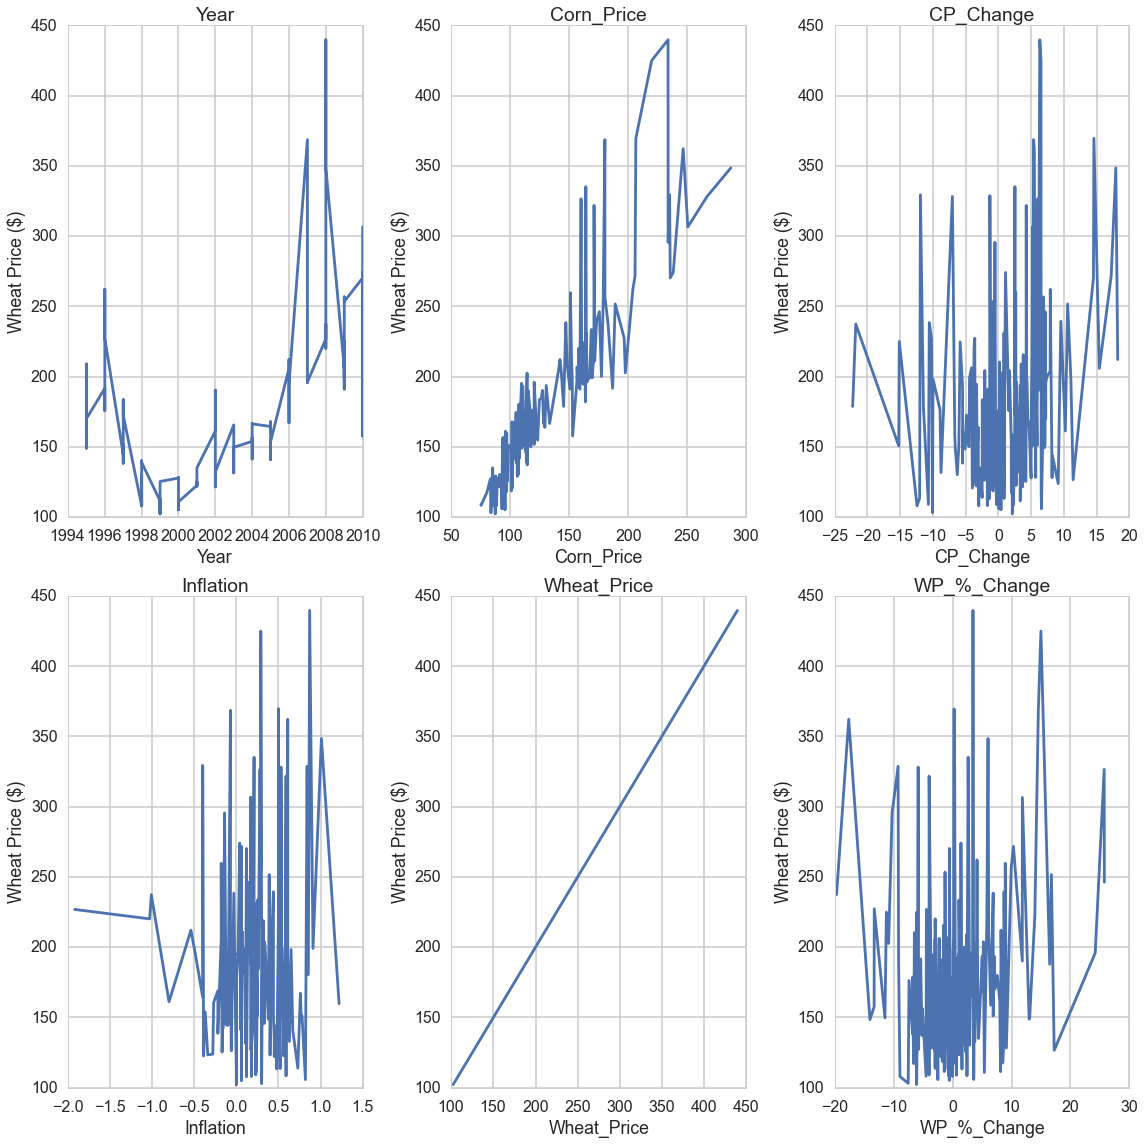

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 16), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
    dftograph=dftouse.sort([p]).set_index(p).reset_index()
    ax.plot(dftograph[p], dftograph['Wheat_Price'], label=p)
    ax.set_title(p)
    ax.set_ylabel('Wheat Price ($)')
    ax.set_xlabel(p)

Now we want to use scatter plots to examine the relationship between Wheat Price and Precipitation. First we look at the relationship between Wheat Price and Precipitation at a monthly level. Specifically, we look at the 5 states with largest wheat production (Kansas, North Dakota, Montana, Washington, Idaho) individually first, and then we look at the average of all states in dftouse. 

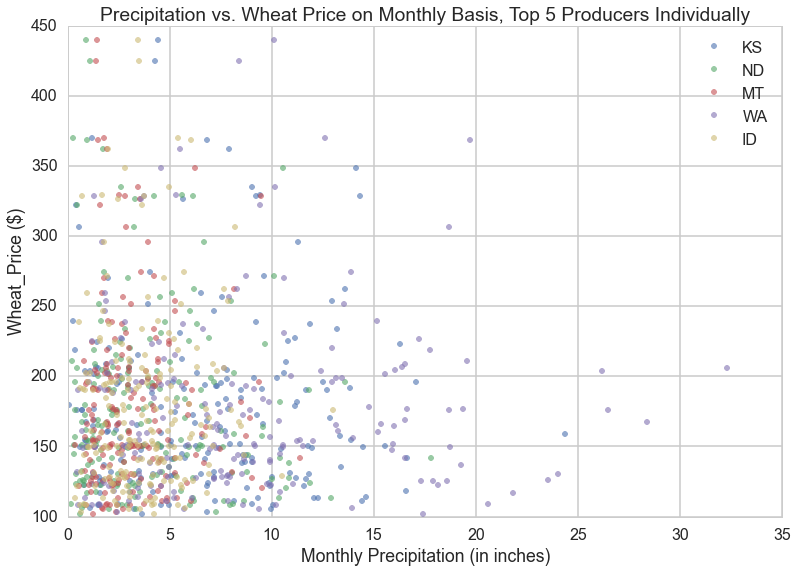

In [23]:
#Top 5 wheat producers, individually 
plt.xlabel('Monthly Precipitation (in inches)')
plt.ylabel('Wheat_Price ($)')
plt.plot(dftouse["KS_P"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["ND_P"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["MT_P"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["WA_P"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["ID_P"],dftouse['Wheat_Price'], '.', alpha=.6)
states = ['KS','ND','MT','WA','ID']
plt.legend(states)
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Individually')

We now average these top 5 producers for a clearer visualization. 

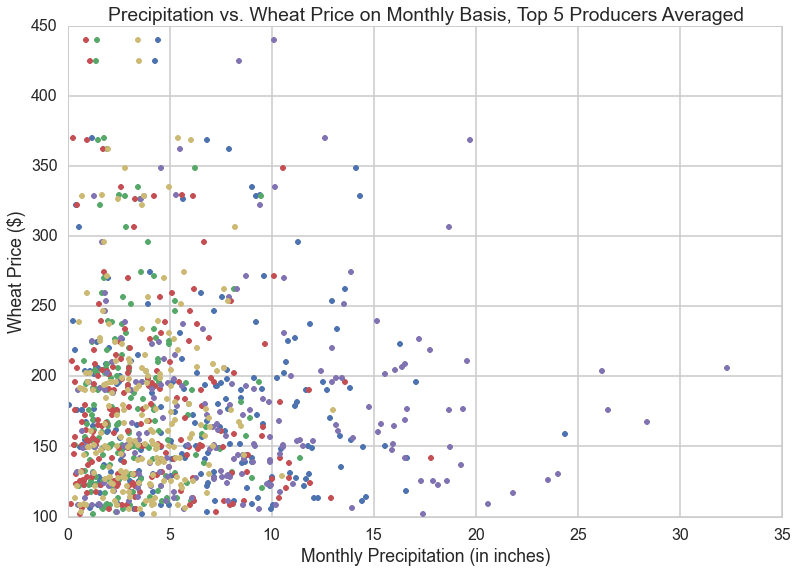

In [24]:
#Top 5 producers averaged
plt.plot(dftouse[["KS_P", "MT_P","ND_P","WA_P","ID_P"]],dftouse[['Wheat_Price']].mean(axis=1),'.')
plt.xlabel('Monthly Precipitation (in inches) ')
plt.ylabel('Wheat Price ($)')
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Averaged')

We also look at the average for all states. 

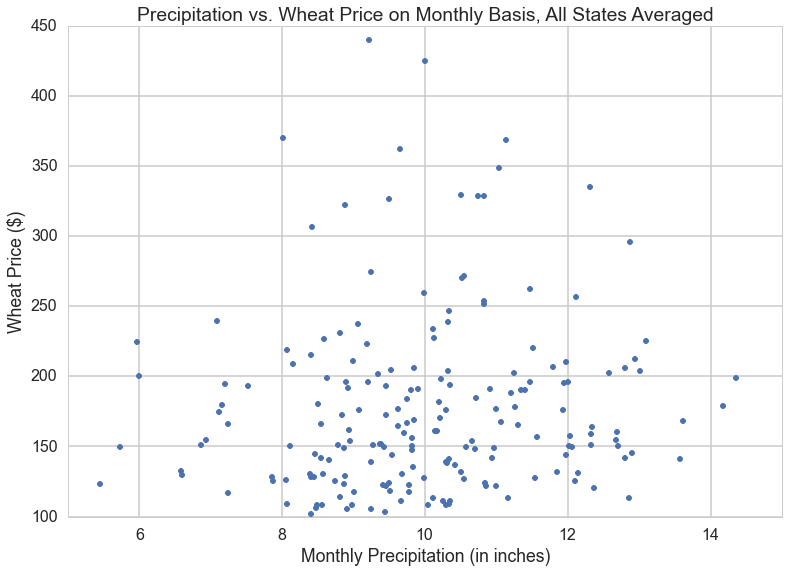

In [25]:
#All states 
plt.plot(dftouse.ix[:,'AK_P':'WY_P'].mean(axis=1),dftouse['Wheat_Price'],'.')
plt.ylabel('Wheat Price ($)')
plt.xlabel('Monthly Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price on Monthly Basis, All States Averaged')

We then examine the correlation between precipitation and wheat price for the same 5 states, but only for March through October, which is growing season through harvest.

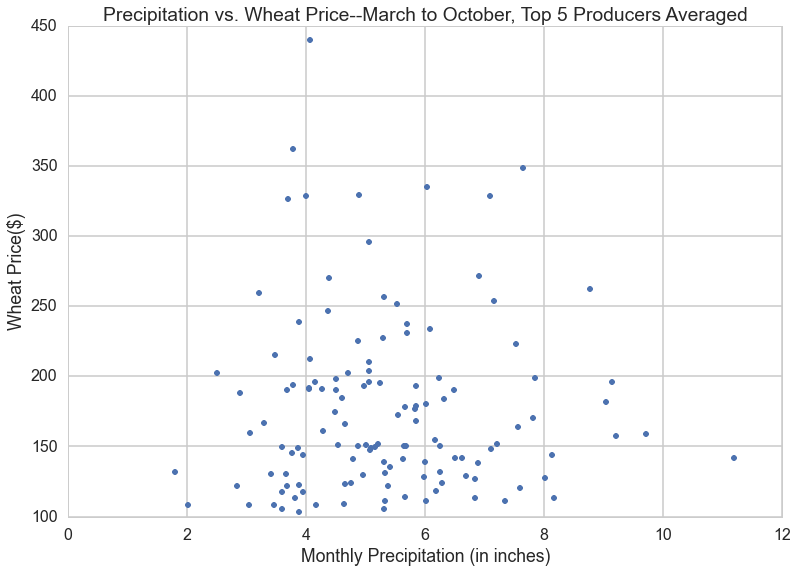

In [26]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
dftouse_Mar_to_Oct = dftouse.loc[dftouse['Month'].isin(months)]
plt.plot(dftouse_Mar_to_Oct[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),dftouse_Mar_to_Oct['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')
plt.xlabel('Monthly Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price--March to October, Top 5 Producers Averaged')

Now we visualize the same five states for wheat price vs. precipitation, but at an annual scale. We hope that less resolution might make seeing trends easier. 

In [27]:
dftouse_year = dftouse.groupby(['Year']).mean().reset_index()

/Users/fanneyzhu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


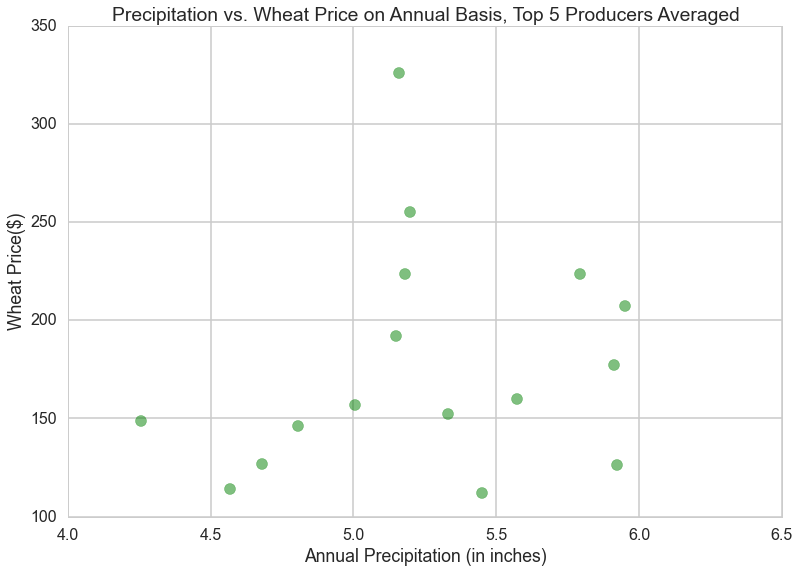

In [28]:
plt.scatter(dftouse_year[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),dftouse_year['Wheat_Price'],s=120,alpha=.5,color='g')
plt.ylabel('Wheat Price($)')
plt.xlabel('Annual Precipitation (in inches)')
plt.title('Precipitation vs. Wheat Price on Annual Basis, Top 5 Producers Averaged')

Now we want to use scatter plots to examine the relationship between Wheat Price and Temperature. First we look at the relationship between Wheat Price and Temperature at a monthly level. Specifically, we look at the 5 states with largest wheat production (Kansas, North Dakota, Montana, Washington, Idaho) individually first, and then we look at the average of all states in dftouse. 

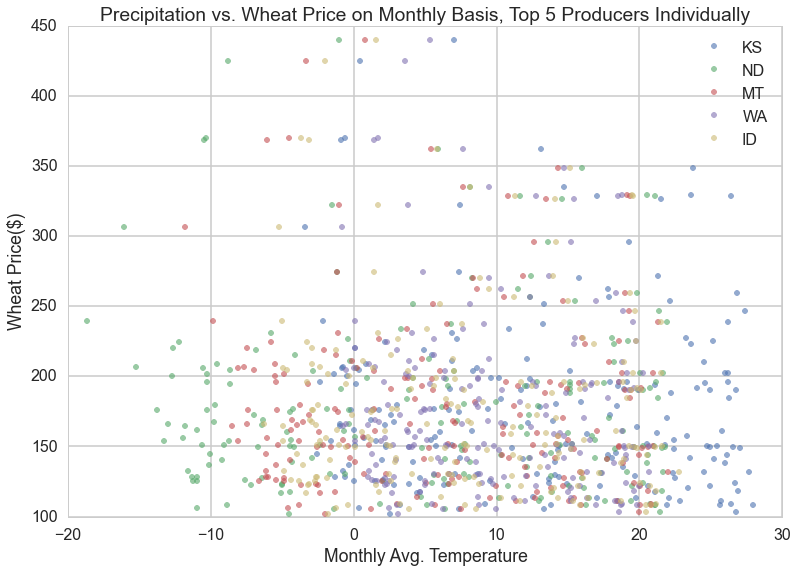

In [29]:
#Top 5 wheat producers, individually 
plt.ylabel('Wheat Price($)')
plt.xlabel('Monthly Avg. Temperature')
plt.plot(dftouse["KS_T"],dftouse['Wheat_Price'],'.', alpha=.6)
plt.plot(dftouse["ND_T"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["MT_T"],dftouse['Wheat_Price'], '.', alpha=.6)
plt.plot(dftouse["WA_T"],dftouse['Wheat_Price'],'.', alpha=.6)
plt.plot(dftouse["ID_T"],dftouse['Wheat_Price'], '.', alpha=.6)
states = ['KS','ND','MT','WA','ID']
plt.legend(states)
plt.title('Precipitation vs. Wheat Price on Monthly Basis, Top 5 Producers Individually')

We now average these top 5 producers for a clearer visualization.

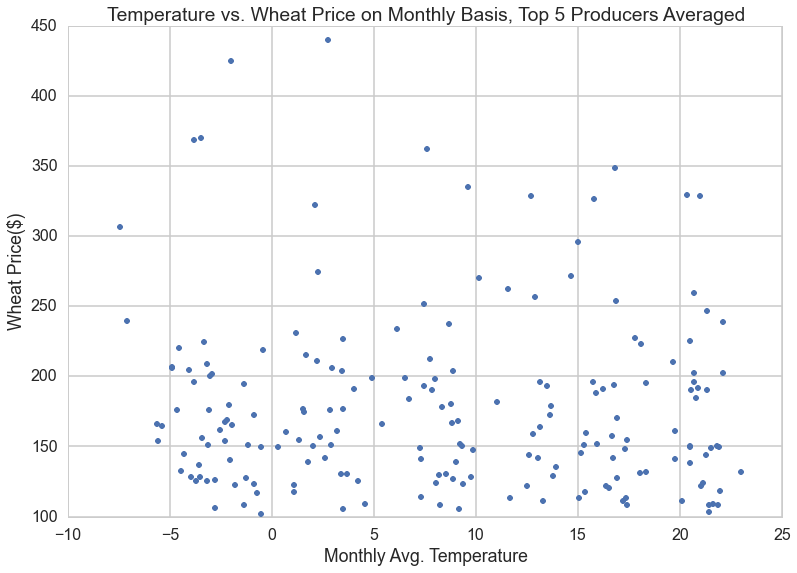

In [30]:
#Top 5 producers averaged
plt.plot(dftouse[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),dftouse['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')
plt.xlabel('Monthly Avg. Temperature')
plt.title('Temperature vs. Wheat Price on Monthly Basis, Top 5 Producers Averaged')

We also look at all states. 

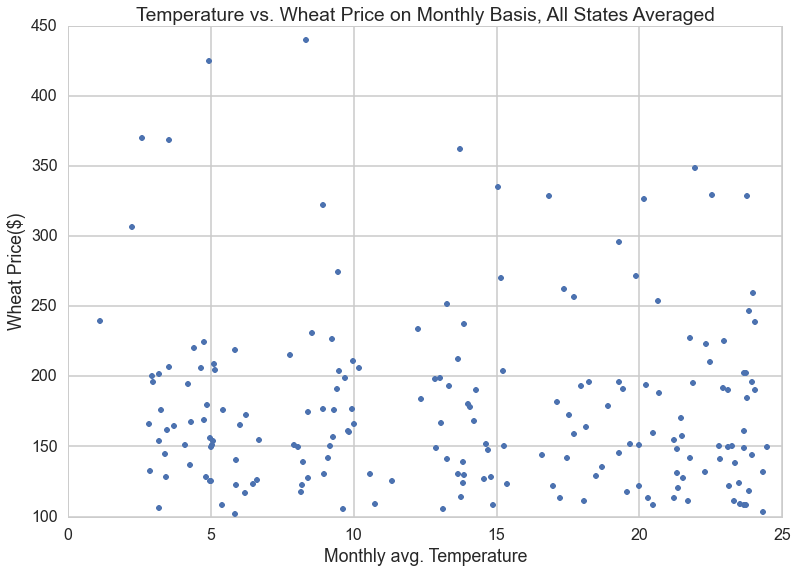

In [31]:
#All states 
plt.plot(dftouse.ix[:,'AK_T':'WY_T'].mean(axis=1),dftouse['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')
plt.xlabel('Monthly avg. Temperature')
plt.title('Temperature vs. Wheat Price on Monthly Basis, All States Averaged')

We then examine the correlation between temperature and wheat price for the same 5 states, but only for March through October, which is growing season through harvest.

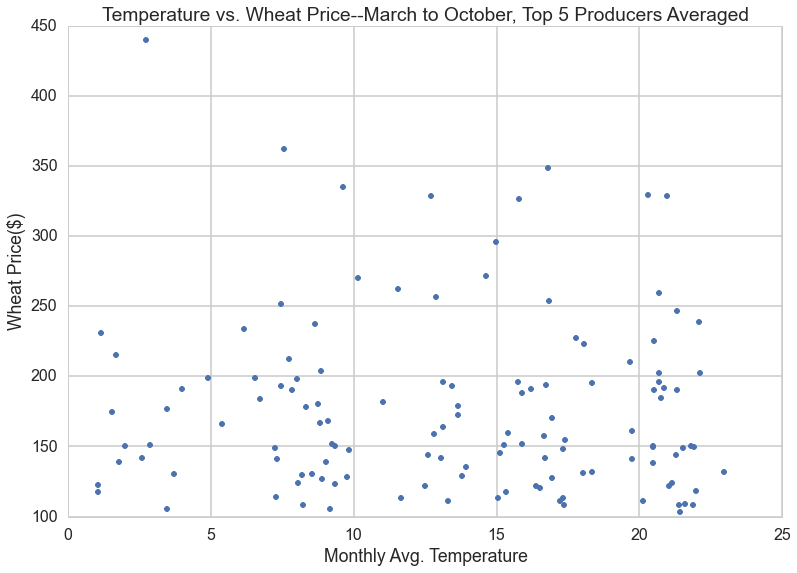

In [32]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
dftouse_Mar_to_Oct = dftouse.loc[dftouse['Month'].isin(months)]
plt.plot(dftouse_Mar_to_Oct[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),dftouse_Mar_to_Oct['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')
plt.xlabel('Monthly Avg. Temperature')
plt.title('Temperature vs. Wheat Price--March to October, Top 5 Producers Averaged')

Now we visualize the same five states for wheat price vs. temperature, but at an annual scale. We hope that less resolution might make seeing trends easier.

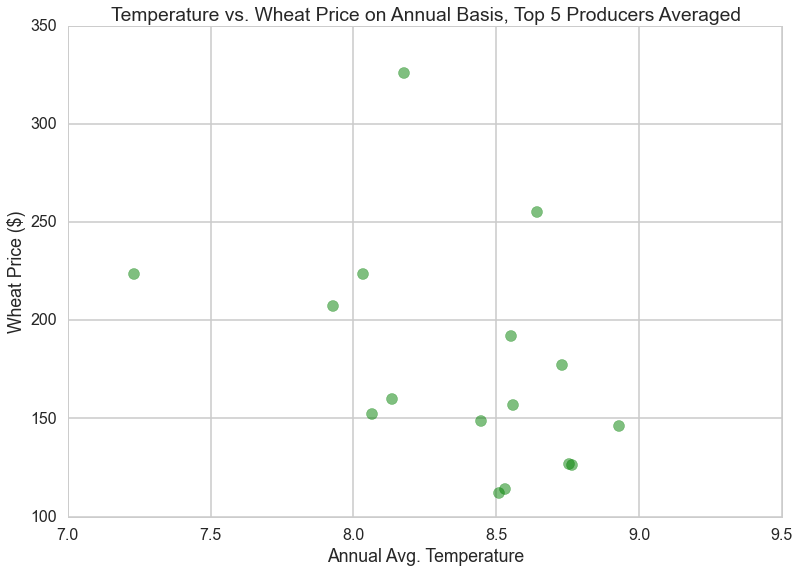

In [33]:
plt.scatter(dftouse_year[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1), dftouse_year['Wheat_Price'],s=120,alpha=.5,color='g')
plt.ylabel('Wheat Price ($)')
plt.xlabel('Annual Avg. Temperature')
plt.title('Temperature vs. Wheat Price on Annual Basis, Top 5 Producers Averaged')

Since we don't seem to be getting very clear correlations, we decided to try something different. Precipitation had a better looking correlation than temperature did, so we plotted temperature vs. next month's wheat price.

In [34]:
next_price=[]
for i in np.arange(len(dftouse.index)-1):
    next_price.append(dftouse['Wheat_Price'][i+1])
next_price.append(next_price[-1])
dftouse['Next_Price']=next_price

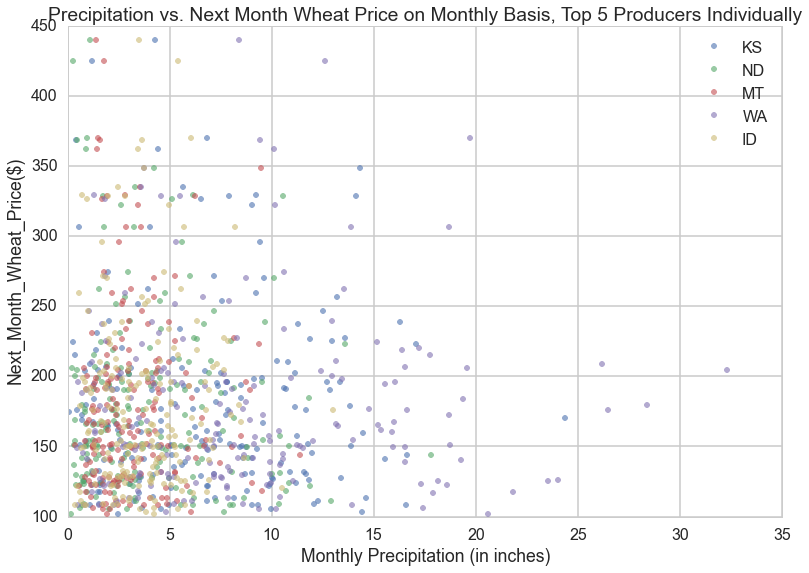

In [35]:
#Top 5 wheat producers, individually 
plt.ylabel('Next_Month_Wheat_Price($)')
plt.xlabel('Monthly Precipitation (in inches)')
plt.plot(dftouse["KS_P"],dftouse['Next_Price'], '.', alpha=.6)
plt.plot(dftouse["ND_P"],dftouse['Next_Price'], '.', alpha=.6)
plt.plot(dftouse["MT_P"],dftouse['Next_Price'], '.', alpha=.6)
plt.plot(dftouse["WA_P"],dftouse['Next_Price'], '.', alpha=.6)
plt.plot(dftouse["ID_P"],dftouse['Next_Price'], '.', alpha=.6)
states = ['KS','ND','MT','WA','ID']
plt.legend(states)
plt.title('Precipitation vs. Next Month Wheat Price on Monthly Basis, Top 5 Producers Individually')

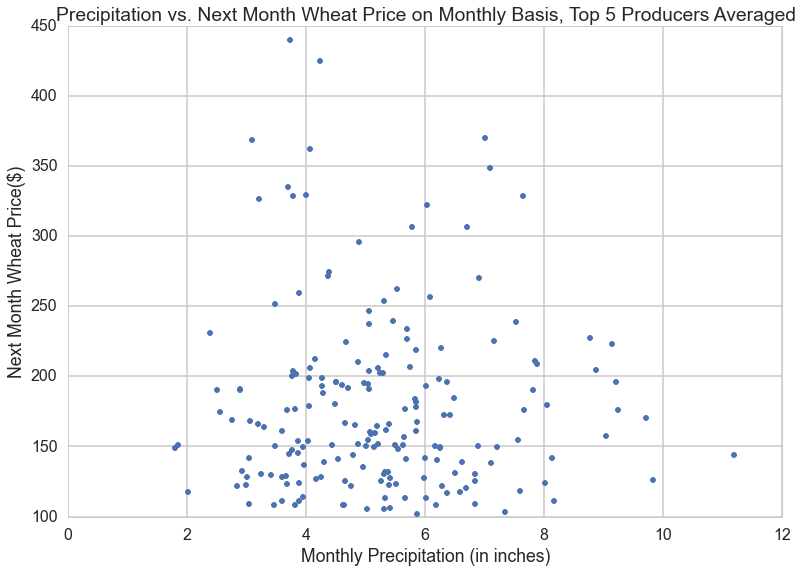

In [36]:
plt.plot(dftouse[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),dftouse['Next_Price'],'.')
plt.ylabel('Next Month Wheat Price($)')
plt.xlabel('Monthly Precipitation (in inches)')
plt.title('Precipitation vs. Next Month Wheat Price on Monthly Basis, Top 5 Producers Averaged')

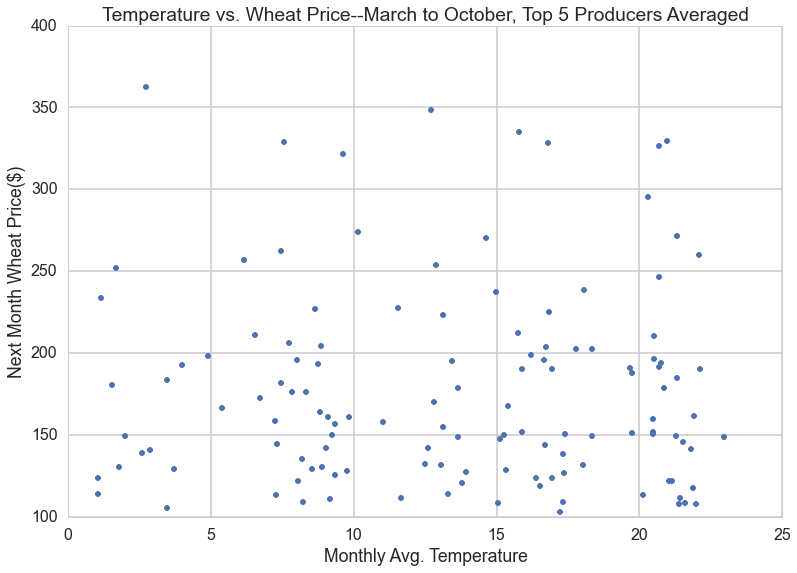

In [37]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
dftouse_Mar_to_Oct = dftouse.loc[dftouse['Month'].isin(months)]
plt.plot(dftouse_Mar_to_Oct[["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),dftouse_Mar_to_Oct['Next_Price'],'.')
plt.ylabel('Next Month Wheat Price($)')
plt.xlabel('Monthly Avg. Temperature')
plt.title('Temperature vs. Wheat Price--March to October, Top 5 Producers Averaged')